In [33]:
import os
import wandb
import matplotlib.pyplot as plt
import logging

from pairwise_network import env, wandb_api
from exp_utils import snd_cmap

## Setup

In [34]:
def filter_runs(runs, filter):
    filtered = runs.copy()
    for key, value in filter.items():
        filtered = wandb_api.filter_runs_by_cfg(filtered, key, value)
    return filtered

In [35]:
tags = ['snd', 'art', 'prelim']
func = 'x1+x2'
# func = 'x1*x2'
filter = {
    'dataset':'art-snd',
    'art_function':func,
    'prune_iterations_max':0,
    'hidden': [10,10],
    'weight_decay': 0,
    'batch_size': 64,
    # 'lr': 0.1
}
if func == 'x1+x2':
    file_prefix = f'y1'
    # file_prefix = f'act-snd-y2-{filter["lr"]}'
    title_prefix = '$y_1$'
else:
    file_prefix = f'y2'
    # file_prefix = f'act-snd-y2-{filter["lr"]}'
    title_prefix = '$y_2$'
partition = 'eval'
drop_tags = ['x3*', 'x4*']
result_dir = env.results_dir
# ext = '.png'
ext = '.pdf'
# env.set_log_level()

In [36]:
runs = wandb_api.get_runs_filtered_by_tag(tags)
logging.info('Filtering runs by config')

print(f'Number of runs: {len(runs)}')

Number of runs: 247


## Baseline (Duplicated Init)

In [37]:
filter['init_scheme'] = 'identical_subnets'
filter['lr'] = 0.1 if func == 'x1+x2' else 0.01
filtered_runs = filter_runs(runs, filter)
print(f'Number of runs: {len(filtered_runs)}')

Number of runs: 4


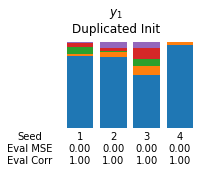

In [38]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
# fig, ax = plt.subplots(1, figsize=(2.3, 2.5))
ax.set_title(title_prefix + '\nDuplicated Init', pad=5)
wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
    rename_subnets=True, cmap=snd_cmap, ax=ax, legend='none',
    add_xtick_metrics=True, metric_format='%.2f')

In [39]:
file_path = os.path.join(result_dir, file_prefix + '-baseline' + ext)
fig.savefig(file_path, facecolor='white')

## Random Init

In [40]:
filter['init_scheme'] = 'random'
filter['lr'] = 0.1 if func == 'x1+x2' else 0.05
filtered_runs = filter_runs(runs, filter)
print(f'Number of runs: {len(filtered_runs)}')

Number of runs: 4


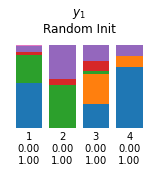

In [46]:
# fig, ax = plt.subplots(1, figsize=(2.8, 2.5))
fig, ax = plt.subplots(1, figsize=(2.3, 2.5))
# fig, ax = plt.subplots(1, figsize=(3.35, 2.5))
ax.set_title(title_prefix + '\nRandom Init', pad=8)
wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
    rename_subnets=True, cmap=snd_cmap, ax=ax, legend='none',
    add_xtick_metrics=False, metric_format='%.2f', drop_tags=drop_tags)

In [47]:
file_path = os.path.join(result_dir, file_prefix + '-random' + ext)
fig.savefig(file_path, facecolor='white')

## Prune

In [43]:
# tags = ['snd', 'prune-no-des']
# filter = {
#     'dataset':'art-snd',
#     'art_function':func,
#     'hidden': [10,10],
#     'weight_decay': 0,
#     'batch_size': 64,
#     'prune_tolerance': 0.05,
#     'prune_amount': 0.1,
#     # 'lr': 0.1
# }
# runs = wandb_api.get_runs_filtered_by_tag(tags)
# filtered_runs = filter_runs(runs, filter)
# print(f'Number of runs: {len(filtered_runs)}')

In [44]:
# # fig, ax = plt.subplots(1, figsize=(5, 4))
# fig, ax = plt.subplots(1, figsize=(3.5, 2.5))
# ax.set_title(title_prefix + ' (Pruned)')
# wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
# wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
#     rename_subnets=True, cmap=snd_cmap, ax=ax, legend='right',
#     add_xtick_metrics=False, drop_tags=drop_tags)

In [45]:
# file_path = os.path.join(result_dir, file_prefix + '-prune' + ext)
# fig.savefig(file_path)